In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import os
import glob
import numpy as np
import csv 
import datetime
import time

import statistics as st
import math

import scipy.io as spio
from datetime import datetime, timedelta
import functools as ft

from sklearn import datasets, linear_model

In [2]:
from sklearn.cluster import KMeans

In [3]:
# loading data
oldfaithful = pd.read_csv('/Users/xiangxiangkong/Downloads/faithful.csv')

In [4]:
oldfaithful

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [ ]:
'''
Problem 1
'''

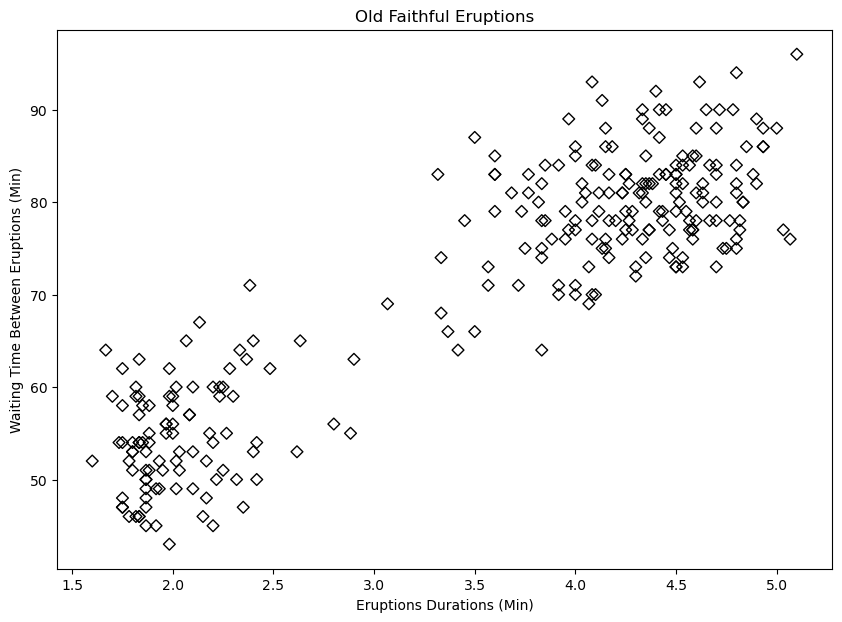

In [5]:
# part a. scatter plot of eruptions and waiting time
plt.figure(figsize=(10,7))
plt.scatter(oldfaithful['eruptions'], oldfaithful['waiting'], marker='D', facecolors='none', edgecolor='black')
plt.xlabel('Eruptions Durations (Min)')
plt.ylabel('Waiting Time Between Eruptions (Min)')
plt.title('Old Faithful Eruptions')

plt.show()

In [ ]:
# part b. There are 2 clusters visually, based on the scatter plot
# One blob can be identified at the upper right portion of the plot, the other blob can be seen at the lower left.

In [ ]:
# part c. Hierarchical clustering algorithm is is an unsupervised clustering algorithm 
# which involves creating clusters that have ordering from top to bottom. It groups similar items into clusters.
# In the example of Agglomerative Hierarchical Clustering, each item starts with single item clusters then takes
# the closest items to form larger clusters. By repeating the process we would eventually get one single cluster.

# I think it is possible to apply Agglomerative Hierarchical Clustering in our case. However, we need to decide the 
# optimal cluster numbers by checking the Dendrogram. By comparing the height of blocks I think 2 clusters would be 
# the optimal solution.

In [ ]:
'''
Problem 2
'''

In [155]:
# part a. Implement K-Means

# Class of k means algorithm
# I created a simple class containing K-Means algorithm, with fit() method to calculate the centeroids and clusters
class Simple_K_Means:
    
    # class constructor, which takes number of cluster as parameter to set up the K-Means object
    def __init__(self, num_clusters):
        self.num_clusters = num_clusters
    
    # fit method, it takes dataframe as the parameter
    def fit(self, df):
        # randomly choose the first centers
        centers = df.sample(n=self.num_clusters).values
        train_df = df.values
        
        # initialize clusters matrix
        clusters = np.zeros(train_df.shape[0])
        
        prev_centers = None
                
        # if there is no update in the centers, the loop stops
        while np.not_equal(centers, prev_centers).any():
            # iterate through each row of dataframe
            for index, row in enumerate(train_df):
                # assign the initial distance of current data point to center into infinity
                min_distance = float('inf')
                
                # for each data point and center, calculate the euclidean distance
                for idx, c in enumerate(centers):
                    distance = np.sqrt((c[0]-row[0])**2 + (c[1]-row[1])**2)
                    
                    # if the distance is smaller, assign the new distance
                    if min_distance > distance:
                        clusters[index] = idx
                        min_distance = distance
                                    
            # update the new centeroid by means
            new_centers = pd.DataFrame(train_df).groupby(by=clusters).mean().values
            
            # keep track of the previous centers, if there is no update in the previous centeroid, the loop stops
            prev_centers = centers
            centers = new_centers
            
        return centers, clusters

In [156]:
# create new object, with the cluster number 2
m = Simple_K_Means(2)

In [157]:
# call the fit method
centeroid, clstr = m.fit(oldfaithful)

Text(0.5, 1.0, 'Old Faithful Eruptions')

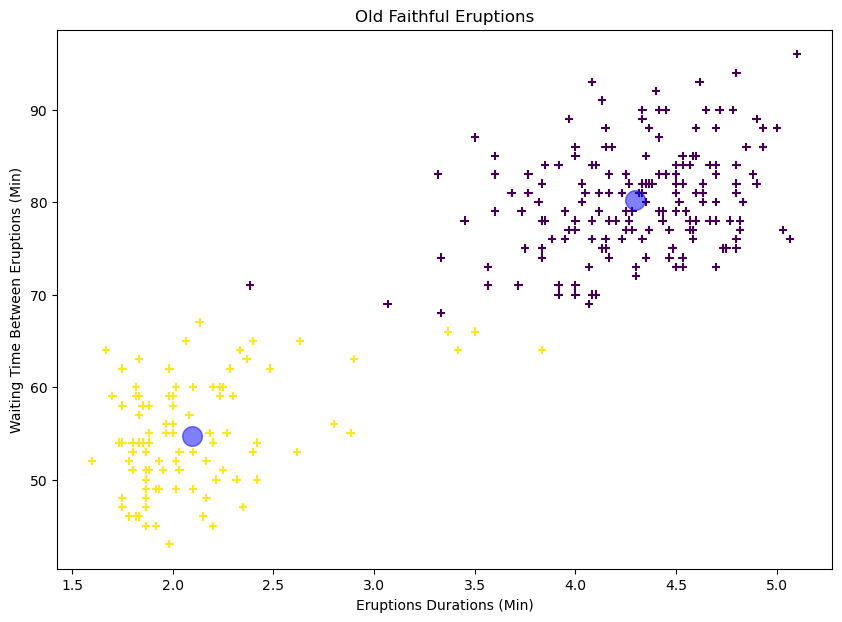

In [158]:
# part b.
# plot the result, each cluster are highlighted in purple and yellow, with their centeriod hightlighted in blue
plt.figure(figsize=(10,7))
plt.scatter(oldfaithful['eruptions'], oldfaithful['waiting'], c=clstr, marker='+')
plt.scatter(centeroid[:, 0], centeroid[:, 1], c='blue', s=200, alpha=0.5);
plt.xlabel('Eruptions Durations (Min)')
plt.ylabel('Waiting Time Between Eruptions (Min)')
plt.title('Old Faithful Eruptions')

In [182]:
# part c.
# Create a method to calculate overall square distance of number of cluster selections
def get_square_distances(df, num_iteration):
    costs = []
    
    train_df = df.values
    
    # iterate through the range of number of clusters
    for i in range(1, num_iteration+1):
        model = Simple_K_Means(i)
        centeroids, clstr = model.fit(df)
    
        cur_sum = 0
        # for each element in the training data, calculate the object function
        for i, row in enumerate(train_df):
            cur_sum += np.sqrt((centeroids[int(clstr[i]), 0]-row[0])**2 +(centeroids[int(clstr[i]), 1]-row[1])**2)
        
        costs.append(cur_sum)
        
    return costs

In [183]:
# try it with maximum of 8 clusters
cost_lst = get_square_distances(oldfaithful, 8)

Text(0, 0.5, 'Square Distance')

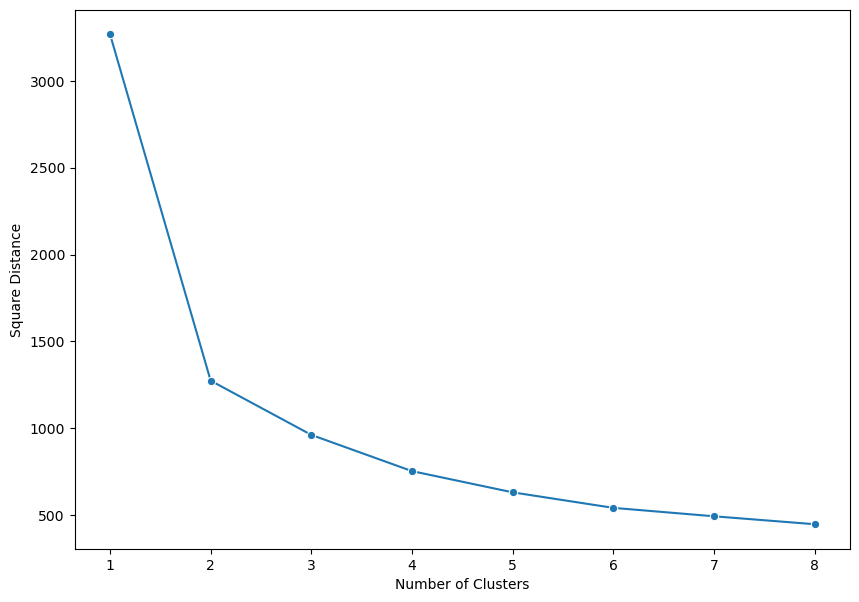

In [179]:
# plot the result
plt.figure(figsize=(10,7))
sns.lineplot(x=range(1,9), y=cost_lst, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Square Distance')

In [ ]:
# part d.
# From the plot above, it is easy to identify that there is a sudden drop in the value from 1 cluster to 2 clusters. 
# And after that the object function is decreasing at the much slower speed. Hence the 'elbow' is at 2. 
# 2 clusters would be a good choice.